<a href="https://colab.research.google.com/github/jchan56/Machine-Learning/blob/main/Ch_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

W, b = np.array([0.5, 0.5]), -0.7

In [ ]:

def perceptron(x1, x2):
    x = np.array([x1, x2])
    tmp = np.sum( W * x ) + b
    if tmp <= 0: return -1
    else: return 1

In [ ]:

print('--- 퍼셉트론으로 구현한 AND 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)


--- 퍼셉트론으로 구현한 AND 게이트 ---
(-1, -1) :  -1
(-1, 1) :  -1
(1, -1) :  -1
(1, 1) :  1


In [ ]:
W, b = np.array([0.7, 0.7]), .5

In [ ]:
print('--- 퍼셉트론으로 구현한 OR 게이트 ---')
for xs in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
    y = perceptron(xs[0], xs[1])
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 OR 게이트 ---
(-1, -1) :  -1
(-1, 1) :  1
(1, -1) :  1
(1, 1) :  1


In [ ]:
import numpy as np
W, b = np.array([0, 0]), 0.0
learning_rate = 0.01

In [ ]:
def activation(s):
  if s> 0: return 1
  elif s<0: return -1
  return 0

In [ ]:
def out(x) :
    return activation (W.dot(x) + b)

In [ ]:
def train(x0, x1, target):
    global W, b
    X = np.array([x0, x1])
    y = out(X)

    ### 예측이 맞으면 아무것도 하지 않음-------------------------------------
    if target == y: return False         # 가중치가 변경되지 않았음을 반환
    ### 예측이 틀리면 학습 실시---------------------------------------------
    print('가중치 수정전 target :{} y:{} b:{} W:{}'.format(target, y, b, W))
    W = W + learning_rate * X * target   # 입력x출력 비례하여 가중치 변경
    b = b + learning_rate * 1 * target   # 편향: 입력이 1이라고 볼 수 있음
    print('가중치 수정후 target :{} y:{} b:{} W:{}'.format(target, y, b, W))
    return True

In [ ]:
def predict(inputs):
    outputs = []
    for x in inputs:
        outputs.append (out(x))
    return outputs

In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1,  1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

가중치 수정전 target :-1 y:0 b:0.0 W:[0 0]
가중치 수정후 target :-1 y:0 b:-0.01 W:[0.01 0.01]
가중치 수정전 target :1 y:-1 b:-0.01 W:[0.01 0.01]
가중치 수정후 target :1 y:-1 b:0.0 W:[0.   0.02]
가중치 수정전 target :1 y:-1 b:0.0 W:[0.   0.02]
가중치 수정후 target :1 y:-1 b:0.01 W:[0.01 0.01]
iteration ------------- 0
iteration ------------- 1


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1  1


In [ ]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1, -1)    # 훈련 데이터 2
    adjusted += train( 1,-1, -1)    # 훈련 데이터 3
    adjusted += train( 1, 1,  1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

가중치 수정전 target :-1 y:1 b:0.01 W:[0.01 0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0.02 0.  ]
가중치 수정전 target :-1 y:1 b:0.0 W:[0.02 0.  ]
가중치 수정후 target :-1 y:1 b:-0.01 W:[0.01 0.01]
iteration ------------- 0
iteration ------------- 1


In [ ]:

X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1 -1
 1 -1 -1
 1  1  1


In [ ]:

adjusted = 0
for i in range(100):
    adjusted += train(-1,-1,  1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

iteration ------------- 0


In [ ]:
 #XOR 진리표는 학습이 되지 않음!!
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0


가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target :-1 y:1 b:0.02 W:[0. 0.]
가중치 수정후 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
iteration ------------- 0
가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target :-1 y:1 b:0.02 W:[0. 0.]
가중치 수정후 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
iteration ------------- 1
가중치 수정전 target :-1 y:1 b:0.01 W:[-0.01 -0.01]
가중치 수정후 target :-1 y:1 b:0.0 W:[0. 0.]
가중치 수정전 target :1 y:0 b:0.0 W:[0. 0.]
가중치 수정후 target :1 y:0 b:0.01 W:[-0.01  0.01]
가중치 수정전 target :1 y:-1 b:0.01 W:[-0.01  0.01]
가중치 수정후 target :1 y:-1 b:0.02 W:[0. 0.]
가중치 수정전 target

In [ ]:
import numpy as np

W = np.array([0, 0, 0, 0])
learning_rate = 0.01

In [ ]:
def activation(s):
    if s > 0: return 1
    elif s < 0: return -1
    return 0

In [ ]:
def out(polyX) :
    return activation (W.dot(polyX))

In [ ]:
def train(x0, x1, target):
    global W
    polyX = np.array([x0, x1, x0*x1, 1])
    y = out(polyX)

    ### 예측이 맞으면 아무것도 하지 않음-------------------------------------
    if target == y: return 0               # 가중치가 변경되지 않았음을 반환
    ### 예측이 틀리면 학습 실시---------------------------------------------
    print('가중치 수정전 target :{} y:{} W:{}'.format(target, y, W))
    W = W + learning_rate * polyX * target # 입력x목표값에 비례하여 변경
    print('가중치 수정후 target :{} y:{} W:{}'.format(target, y, W))
    return 1                               # 가중치가 변경되었음을 반환


In [ ]:
def predict(inputs):
    outputs = []
    for x in inputs:
        polyX = np.array([x[0], x[1], x[0]*x[1], 1])
        outputs.append (out(polyX))
    return outputs

In [ ]:

adjusted = 0
for i in range(100):
    adjusted += train(-1,-1, -1)    # 훈련 데이터 1
    adjusted += train(-1, 1,  1)    # 훈련 데이터 2
    adjusted += train( 1,-1,  1)    # 훈련 데이터 3
    adjusted += train( 1, 1, -1)    # 훈련 데이터 4
    print("iteration -------------", i)
    if not adjusted: break  # 모든 훈련에 대해 가중치 변화 없으면 학습종료
    adjusted = 0

X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

가중치 수정전 target :-1 y:0 W:[0 0 0 0]
가중치 수정후 target :-1 y:0 W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정전 target :1 y:0 W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정후 target :1 y:0 W:[ 0.    0.02 -0.02  0.  ]
가중치 수정전 target :1 y:0 W:[ 0.    0.02 -0.02  0.  ]
가중치 수정후 target :1 y:0 W:[ 0.01  0.01 -0.03  0.01]
가중치 수정전 target :-1 y:1 W:[ 0.01  0.01 -0.03  0.01]
가중치 수정후 target :-1 y:1 W:[ 0.    0.   -0.04  0.  ]
iteration ------------- 0
iteration ------------- 1
x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1 -1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
U = np.random.rand(2,3)   # 연결강도
W = np.random.rand(3,2)   # 연결강도
learning_rate = 1.0       # 학습률

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)


In [ ]:
input = np.zeros(2)

# 순전파시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들
h_error, h_delta = np.zeros(3), np.zeros(3)

# 순전파시 계산될 값들
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들
y_error, y_delta = np.zeros(2), np.zeros(2)

In [ ]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = x
    h_sum = U.T.dot(input)                 # 은닉층에서 합산된 값
    h_out = sigmoid(h_sum)                 # 은닉층의 활성화 값
    h_deriv = derivative_sigmoid(h_sum)    # 은닉층 활성화 미분치


In [ ]:
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_sum)     # 출력층의 활성화 미분치

In [ ]:
def compute_error(target):
    return y_out - target                   # 오차의 계산

In [ ]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW

In [ ]:
def backward_h():
  global h_error, h_delta, U
  h_error = W.dot(y_delta)
  h_delta = h_deriv * h_error

  dU = - learning_rate * np.outer(input, h_delta)
  U = + dU

In [ ]:
def train(x, target):
  forward_xh(x)
  forward_hy()
  e = compute_error(target)
  backward_y(e)
  backward_h()
  return e**2

In [ ]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    loss.append(e_accum)

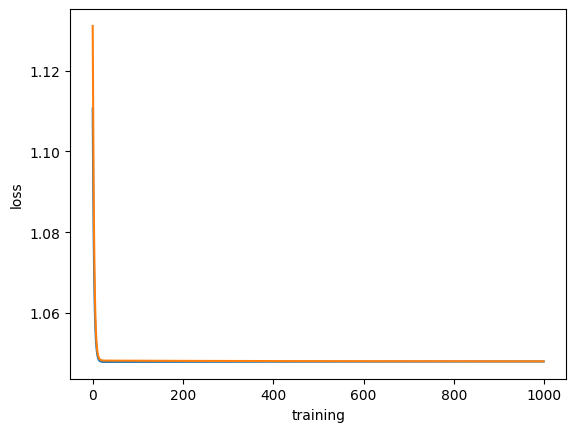

In [ ]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [ ]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [ ]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))


[array([0.49915721, 0.50085367]),
 array([0.49917872, 0.50087664]),
 array([0.49917872, 0.50087664]),
 array([0.49920024, 0.50089961])]

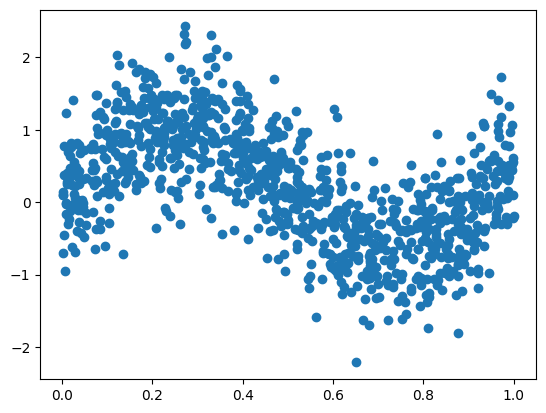

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [ ]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx , nh1)*2
V = np.random.randn(nh1, nh2)*2
W = np.random.randn(nh2, ny)*2
learning_rate = 0.1

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [ ]:
put = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산